In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import xgboost as xgb

In [3]:
%run Pre.py

In [4]:
train = pd.read_csv('train_c.csv')
test = pd.read_csv('test_c.csv')
macro = pd.read_csv('macro_c.csv')

In [5]:
print(macro.columns)

Index(['timestamp', 'oil_urals', 'gdp_quart', 'gdp_quart_growth', 'cpi', 'ppi',
       'gdp_deflator', 'balance_trade', 'balance_trade_growth', 'usdrub',
       'eurrub', 'brent', 'net_capital_export', 'gdp_annual',
       'gdp_annual_growth', 'average_provision_of_build_contract',
       'average_provision_of_build_contract_moscow', 'rts', 'micex',
       'micex_rgbi_tr', 'micex_cbi_tr', 'deposits_value', 'deposits_growth',
       'deposits_rate', 'mortgage_value', 'mortgage_growth', 'mortgage_rate',
       'grp', 'grp_growth', 'income_per_cap',
       'real_dispos_income_per_cap_growth', 'salary', 'salary_growth',
       'fixed_basket', 'retail_trade_turnover',
       'retail_trade_turnover_per_cap', 'retail_trade_turnover_growth',
       'labor_force', 'unemployment', 'employment',
       'invest_fixed_capital_per_cap', 'invest_fixed_assets',
       'profitable_enterpr_share', 'unprofitable_enterpr_share',
       'share_own_revenues', 'overdue_wages_per_cap', 'fin_res_per_cap',
    

In [7]:
depo_mor_col = ['timestamp','deposits_value', 'deposits_growth','deposits_rate', 'mortgage_value', 'mortgage_growth', 'mortgage_rate']

In [15]:
macro_selected = macro[depo_mor_col]
macro_selected.head()

,timestamp,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate
0,2010-01-01,7484970.0,NaN,NaN,142968.0,NaN,13.72
1,2010-01-02,7484970.0,NaN,NaN,142968.0,NaN,13.72
2,2010-01-03,7484970.0,NaN,NaN,142968.0,NaN,13.72
3,2010-01-04,7484970.0,NaN,NaN,142968.0,NaN,13.72
4,2010-01-05,7484970.0,NaN,NaN,142968.0,NaN,13.72


In [16]:
train = train.merge(macro_selected,on='timestamp',how='left')
test = test.merge(macro_selected,on='timestamp',how='left')

In [17]:
col = list(test.columns)[2:]

In [19]:
label = train['price_doc']*0.95+10.5
dtrain = xgb.DMatrix(train[col],label)
dtest = xgb.DMatrix(test[col])

In [20]:
params = {
    'eta': 0.05, ## Try 0.01,3,5
    'max_depth': 5,## Try 4,5,6
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

[0]	train-rmse:7.79559e+06	test-rmse:7.79993e+06
[50]	train-rmse:2.38844e+06	test-rmse:2.76821e+06
[100]	train-rmse:2.06286e+06	test-rmse:2.59134e+06
[150]	train-rmse:1.94106e+06	test-rmse:2.55188e+06
[200]	train-rmse:1.85463e+06	test-rmse:2.52885e+06
[250]	train-rmse:1.78331e+06	test-rmse:2.51556e+06
[300]	train-rmse:1.72118e+06	test-rmse:2.51038e+06
[350]	train-rmse:1.66648e+06	test-rmse:2.50366e+06
[400]	train-rmse:1.6183e+06	test-rmse:2.50075e+06
[450]	train-rmse:1.57137e+06	test-rmse:2.49764e+06
Performance does not improve from 450 rounds


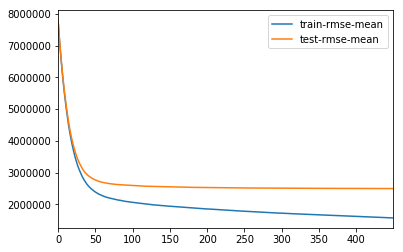

In [21]:
xgb_cvalid = xgb.cv(params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False,seed=42)
xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()
print('Performance does not improve from '+str(len(xgb_cvalid))+' rounds')

In [22]:
model = xgb.train(params,dtrain,num_boost_round=len(xgb_cvalid))

In [23]:
get_feature_importance(model)

,Feature,Score
176,full_sq,1275
35,life_sq,560
99,floor,351
127,build_year,320
131,max_floor,266
196,deposits_value,185
244,kitch_sq,166
72,num_room,158
130,state,131
23,radiation_km,124
